In [1]:
dpi = 300
image_save_dpi = 300

import matplotlib_inline

%matplotlib inline
%matplotlib inline

import matplotlib.pyplot as plt

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
%config InlineBackend.figure_formats = ['retina'] 

import seaborn as sns
import matplotlib

sns.set(rc={"figure.dpi":dpi, 'savefig.dpi':dpi})
sns.set_context('notebook')
sns.set_style("ticks")
matplotlib.rcParams["figure.dpi"] = dpi
plt.rcParams['figure.dpi'] = dpi

In [2]:
import numpy as np
import pandas as pd

# Data

In [3]:
data = pd.read_excel('Data/Data_Volcano_Eruption.xlsx',skiprows=[0])
list1 = data[['Volcano Name', 'VEI', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day']]

list1['Start Month'] = list1['Start Month'].fillna(1)
list1.loc[list1['Start Month'] ==0,'Start Month'] = 1



list1['Start Year'] = list1['Start Year'].astype(int)
list1['Start Month'] = list1['Start Month'].astype(int)
list1 = list1[
    (list1['Start Year']>=1800) &
    (list1['VEI'] >=2)]

C:\Users\geika\AppData\Local\Temp\ipykernel_16380\900251785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list1['Start Month'] = list1['Start Month'].fillna(1)
C:\Users\geika\AppData\Local\Temp\ipykernel_16380\900251785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list1['Start Year'] = list1['Start Year'].astype(int)
C:\Users\geika\AppData\Local\Temp\ipykernel_16380\900251785.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

## Data processing

In [4]:
list1['Start Date'] = pd.to_datetime(list1['Start Year'].astype(str) + '-' + list1['Start Month'].astype(str) + '-01')
list1 = list1.sort_values(by='Start Date', ascending=False)
list1['Repose'] = list1['Start Date'].shift(1) - list1['Start Date']
list1['Repose'] = list1['Repose'].dt.days//30

list2 = list1
list2 = list2.dropna(subset='Repose')

## Stationarity check

ADF Statistic: -3.209211673381072
p-value: 0.01945762497450039
Critical values:
   1%, -3.4486972813047574
Critical values:
   5%, -2.8696246923288418
Critical values:
   10%, -2.571077032068342
Reject Ho - Time Series is Stationary


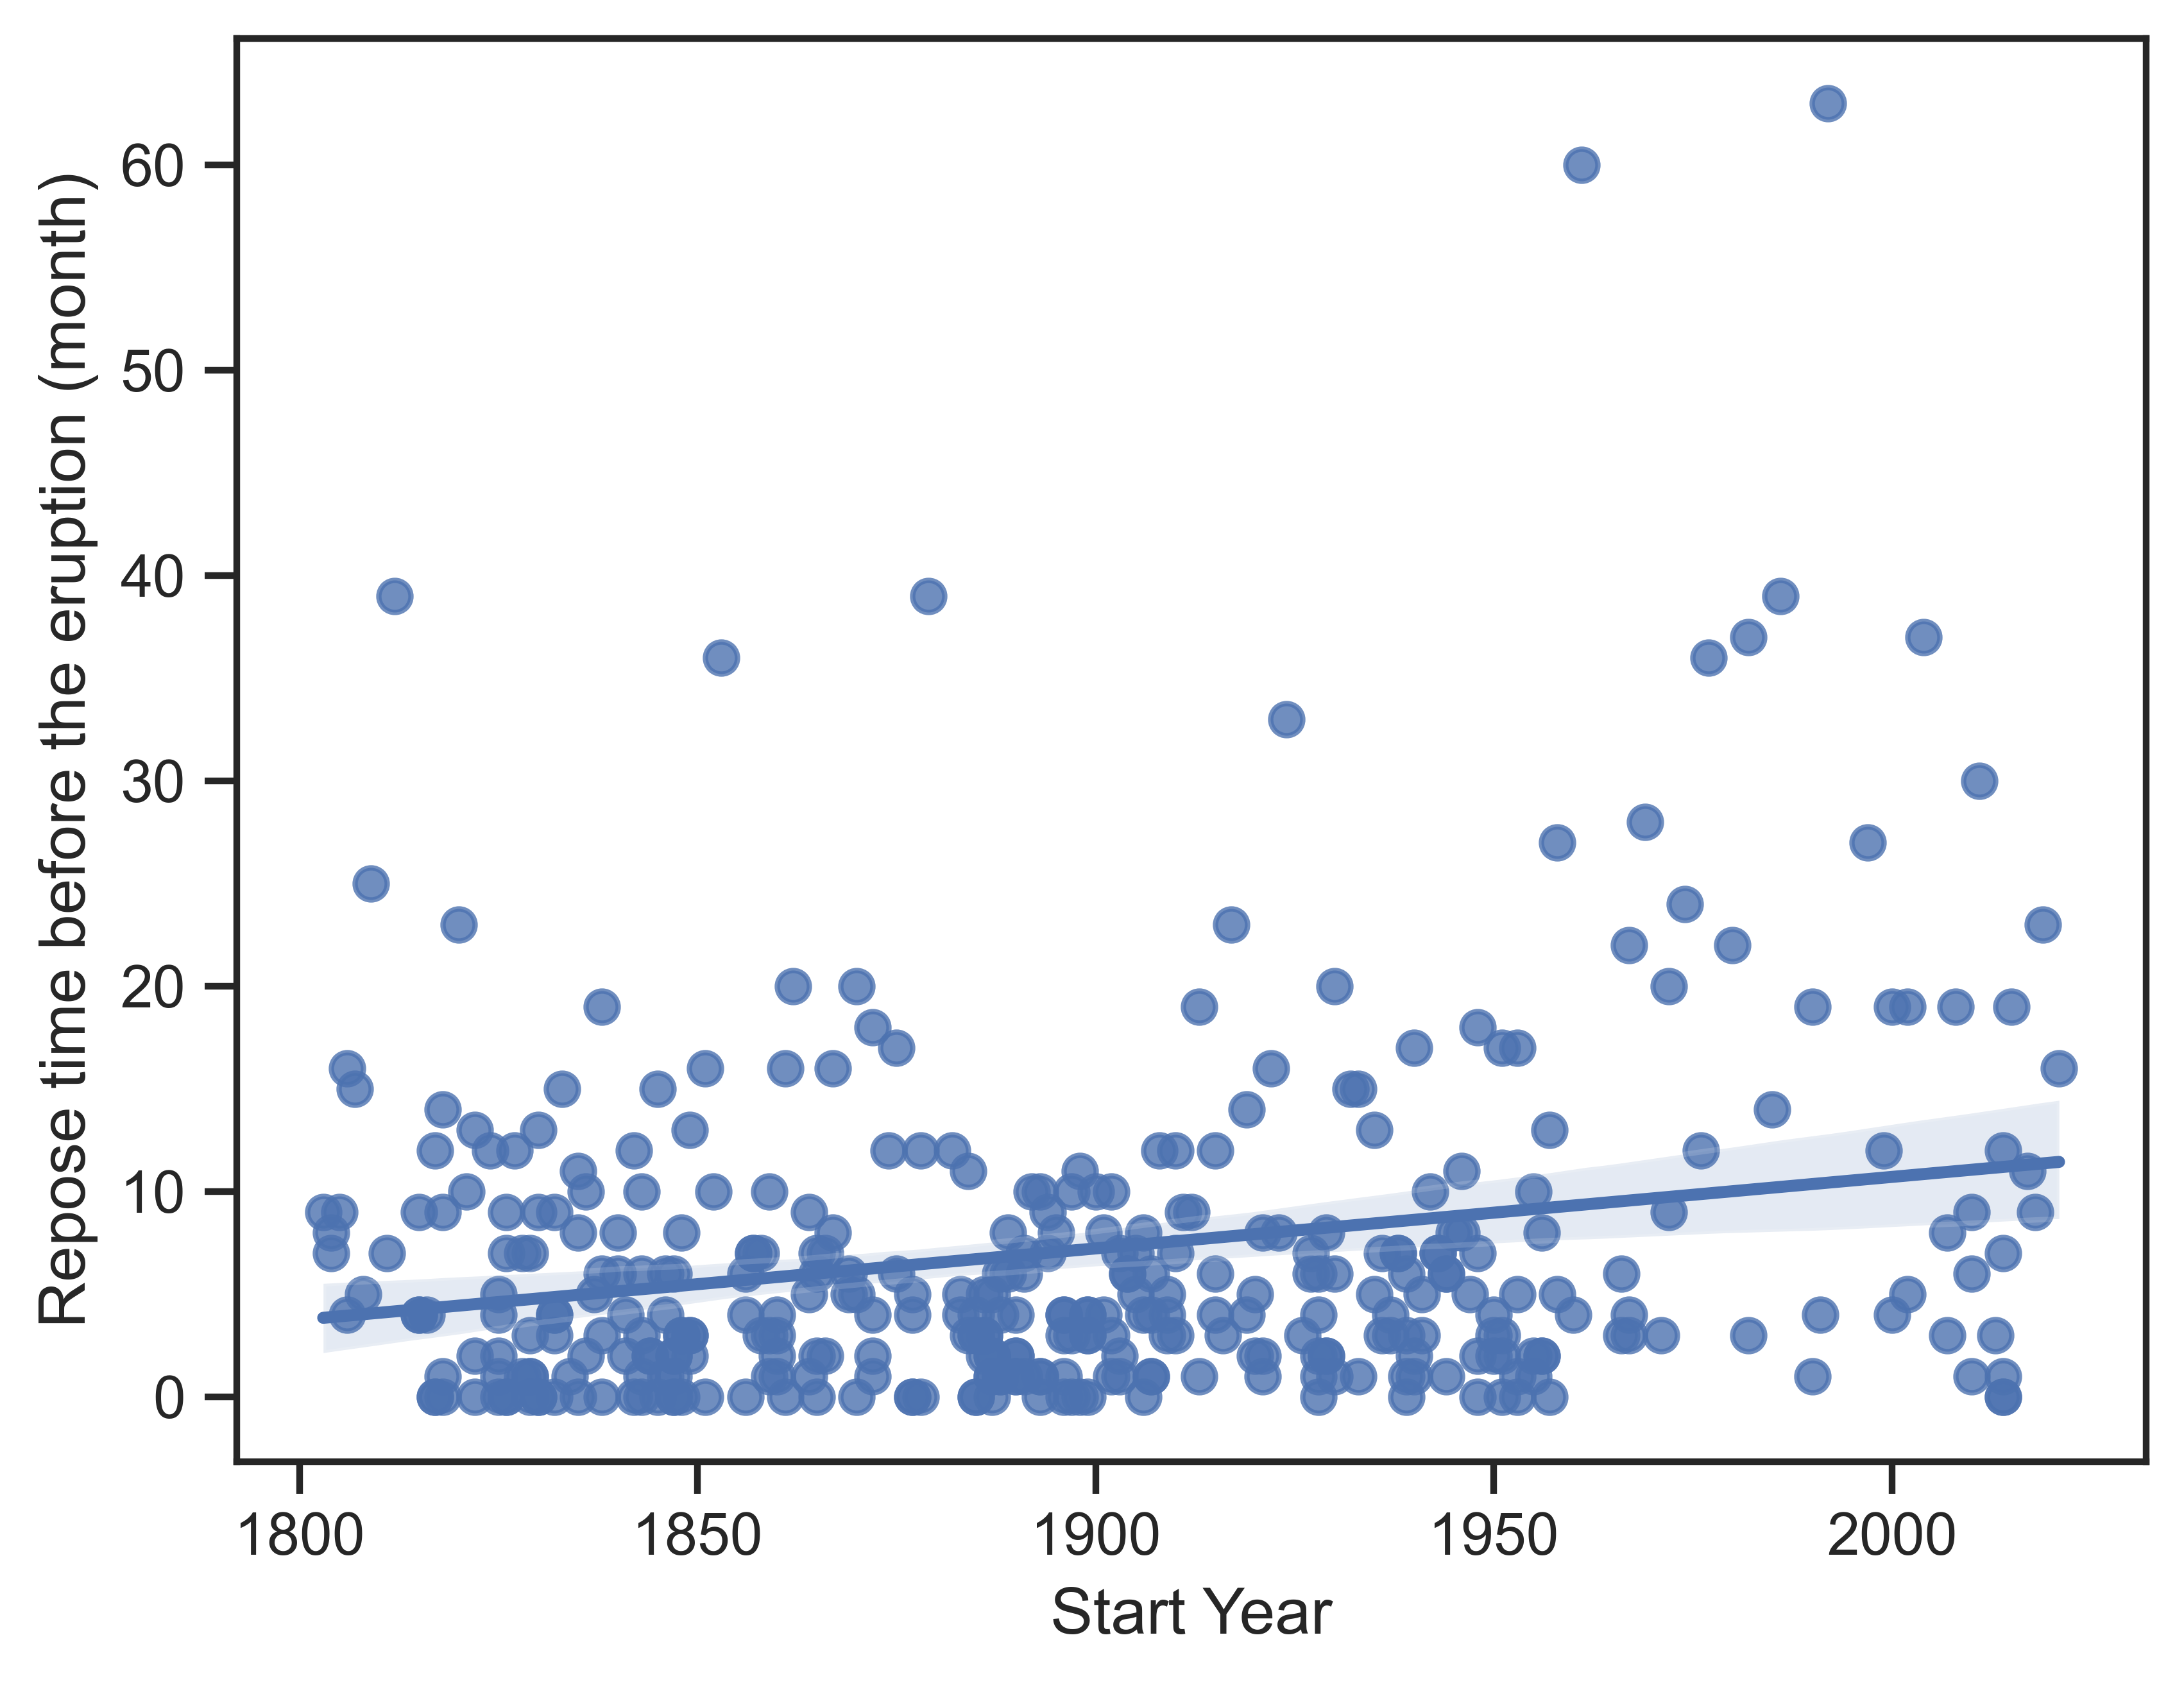

In [5]:
import seaborn as sns
sns.regplot(data=list2, x='Start Year', y='Repose')
plt.ylabel('Repose time before the eruption (month)')

from statsmodels.tsa.stattools import adfuller, kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
result = adfuller(list2['Repose'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical values:')
    print(f'   {key}, {value}')
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

## Independence check

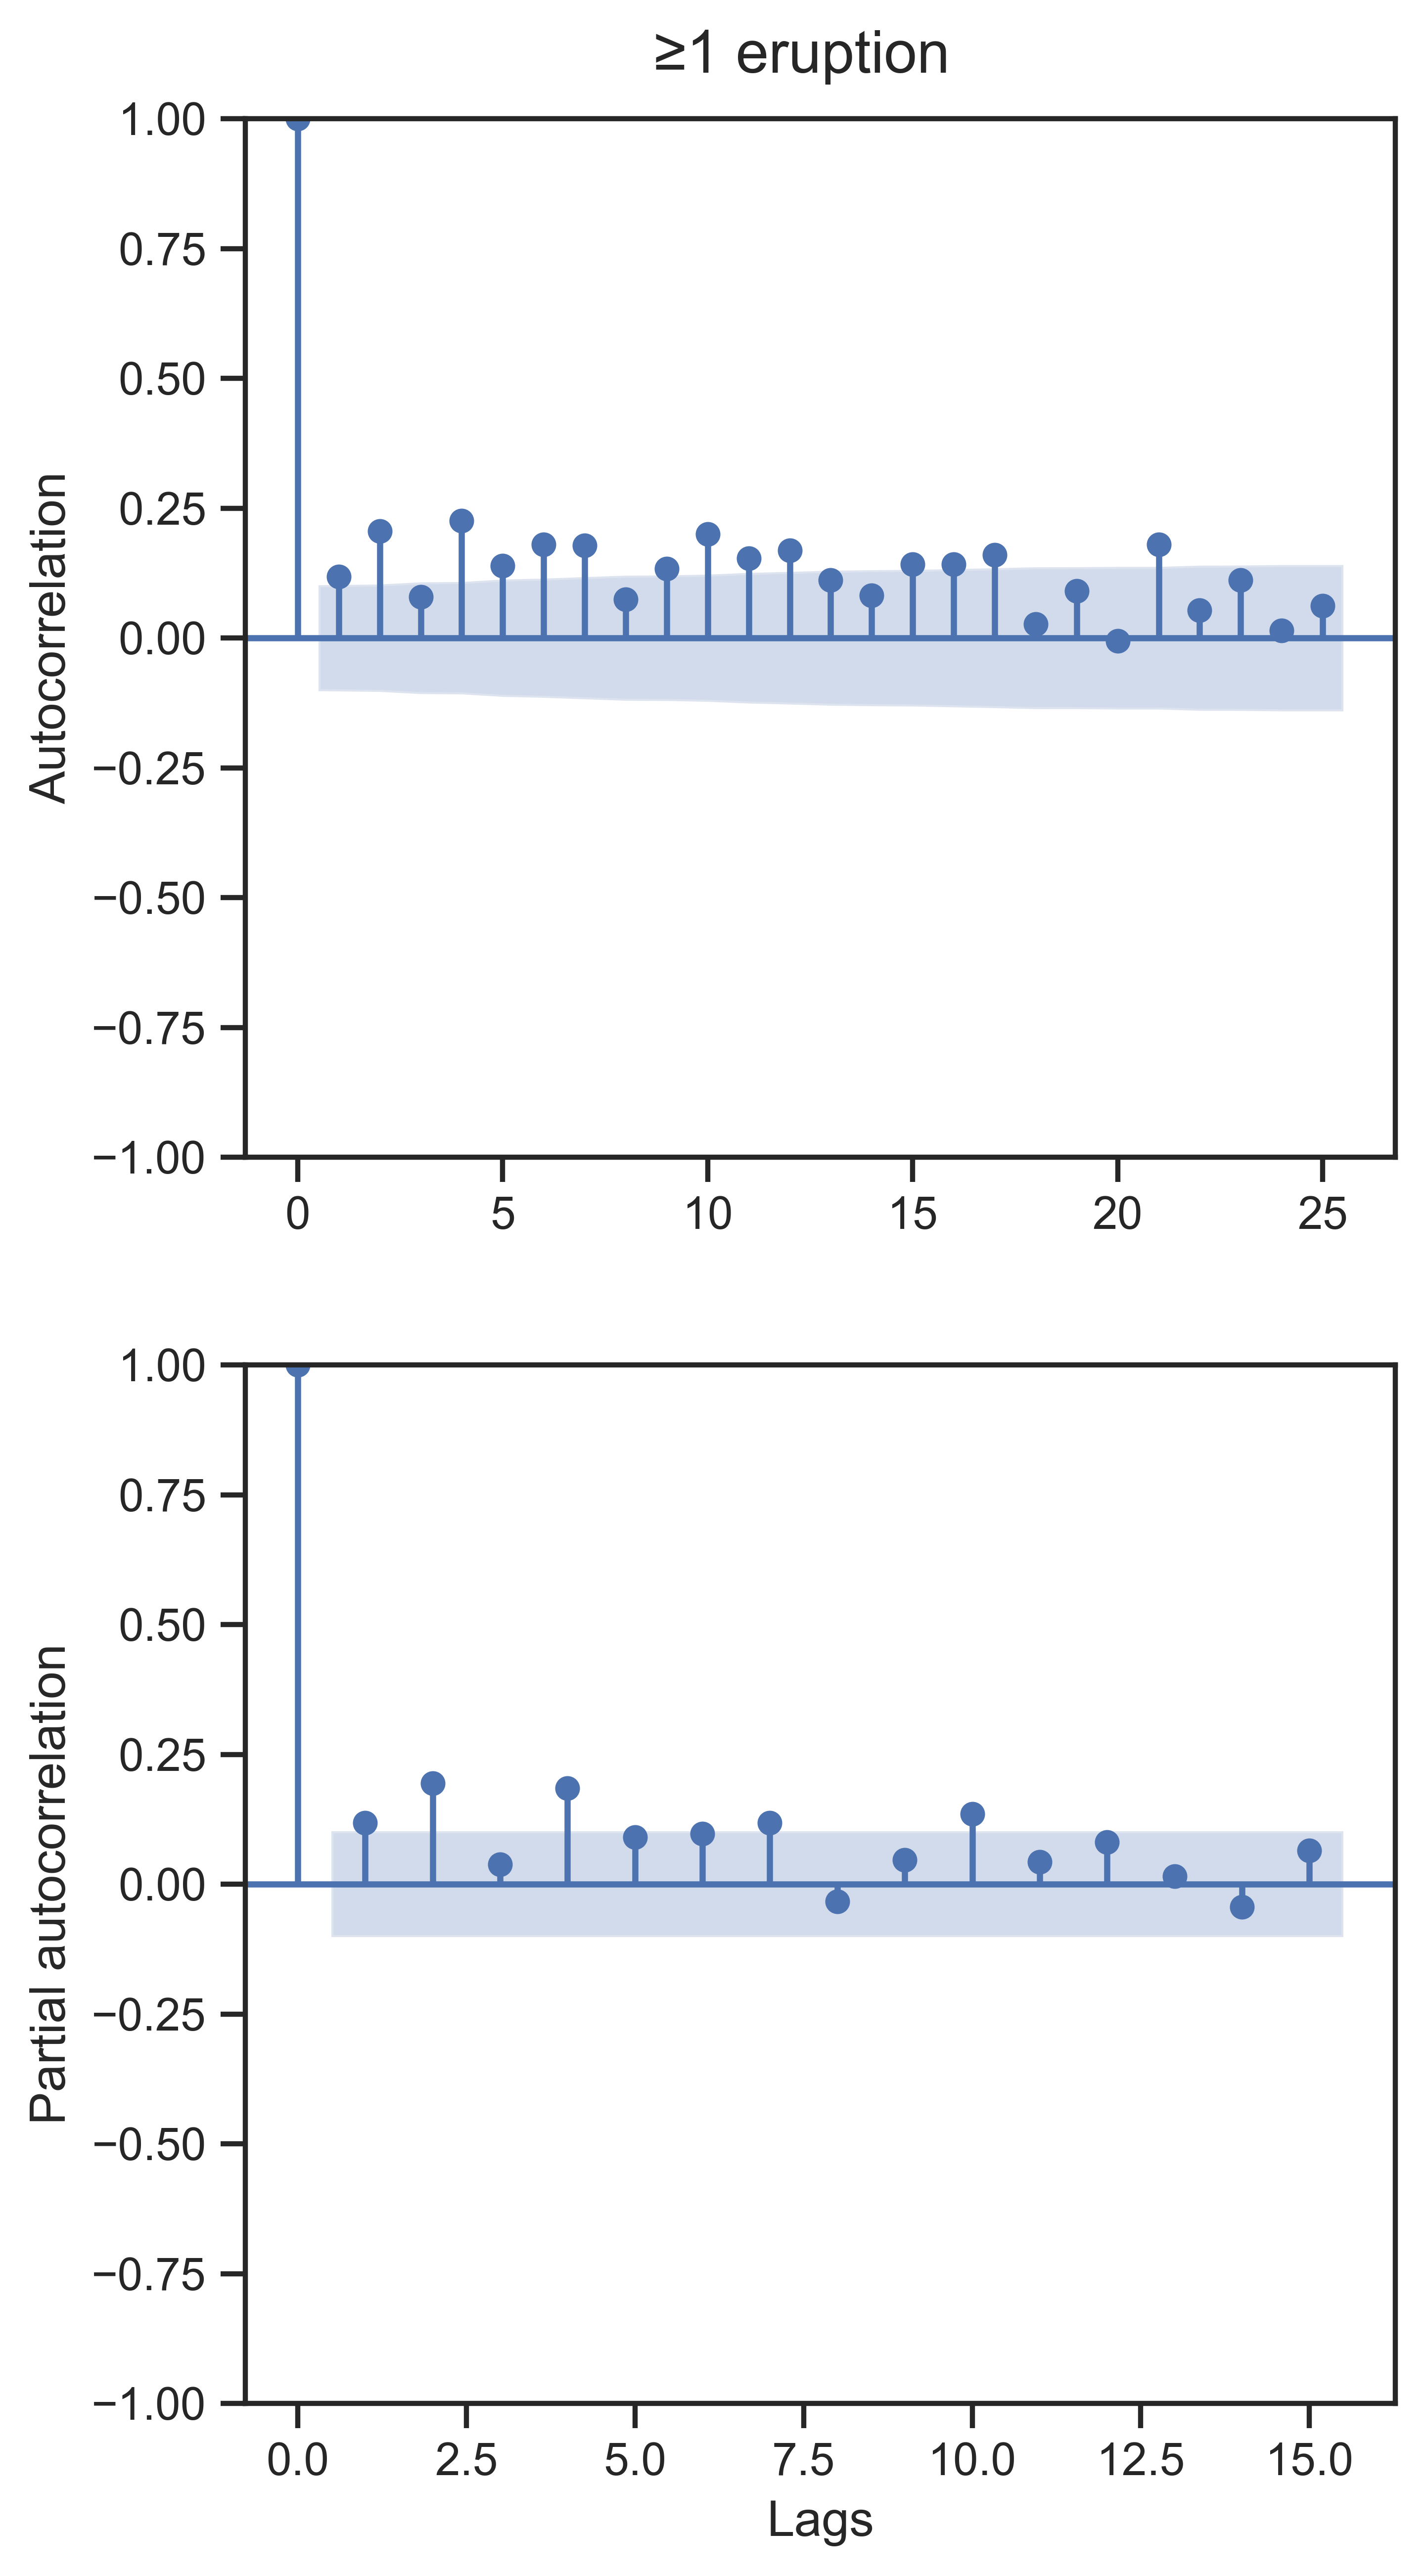

In [6]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))

# Check autocorrelation
plot_acf(x=list2['Repose'], lags=25, ax=axs[0],alpha=.05)
fig.suptitle('≥1 eruption',y=0.91)
axs[0].set_ylabel('Autocorrelation')
axs[0].set_title('')

# Check partial autocorrelation
plot_pacf(x=list2['Repose'], lags=15, ax=axs[1])
axs[1].set_ylabel('Partial autocorrelation')
axs[1].set_title('')
axs[1].set_xlabel('Lags')
plt.show()

## Descriptive statistic

In [7]:
print('modus :', list2['Repose'].mode())
print('median: ', list2['Repose'].median())
print('variansi: ', list2['Repose'].var())
print(list2['Repose'].describe())

modus : 0    0.0
Name: Repose, dtype: float64
median:  4.0
variansi:  71.15455991516437
count    369.000000
mean       7.105691
std        8.435316
min        0.000000
25%        2.000000
50%        4.000000
75%        9.000000
max       63.000000
Name: Repose, dtype: float64


## Repose time histogram

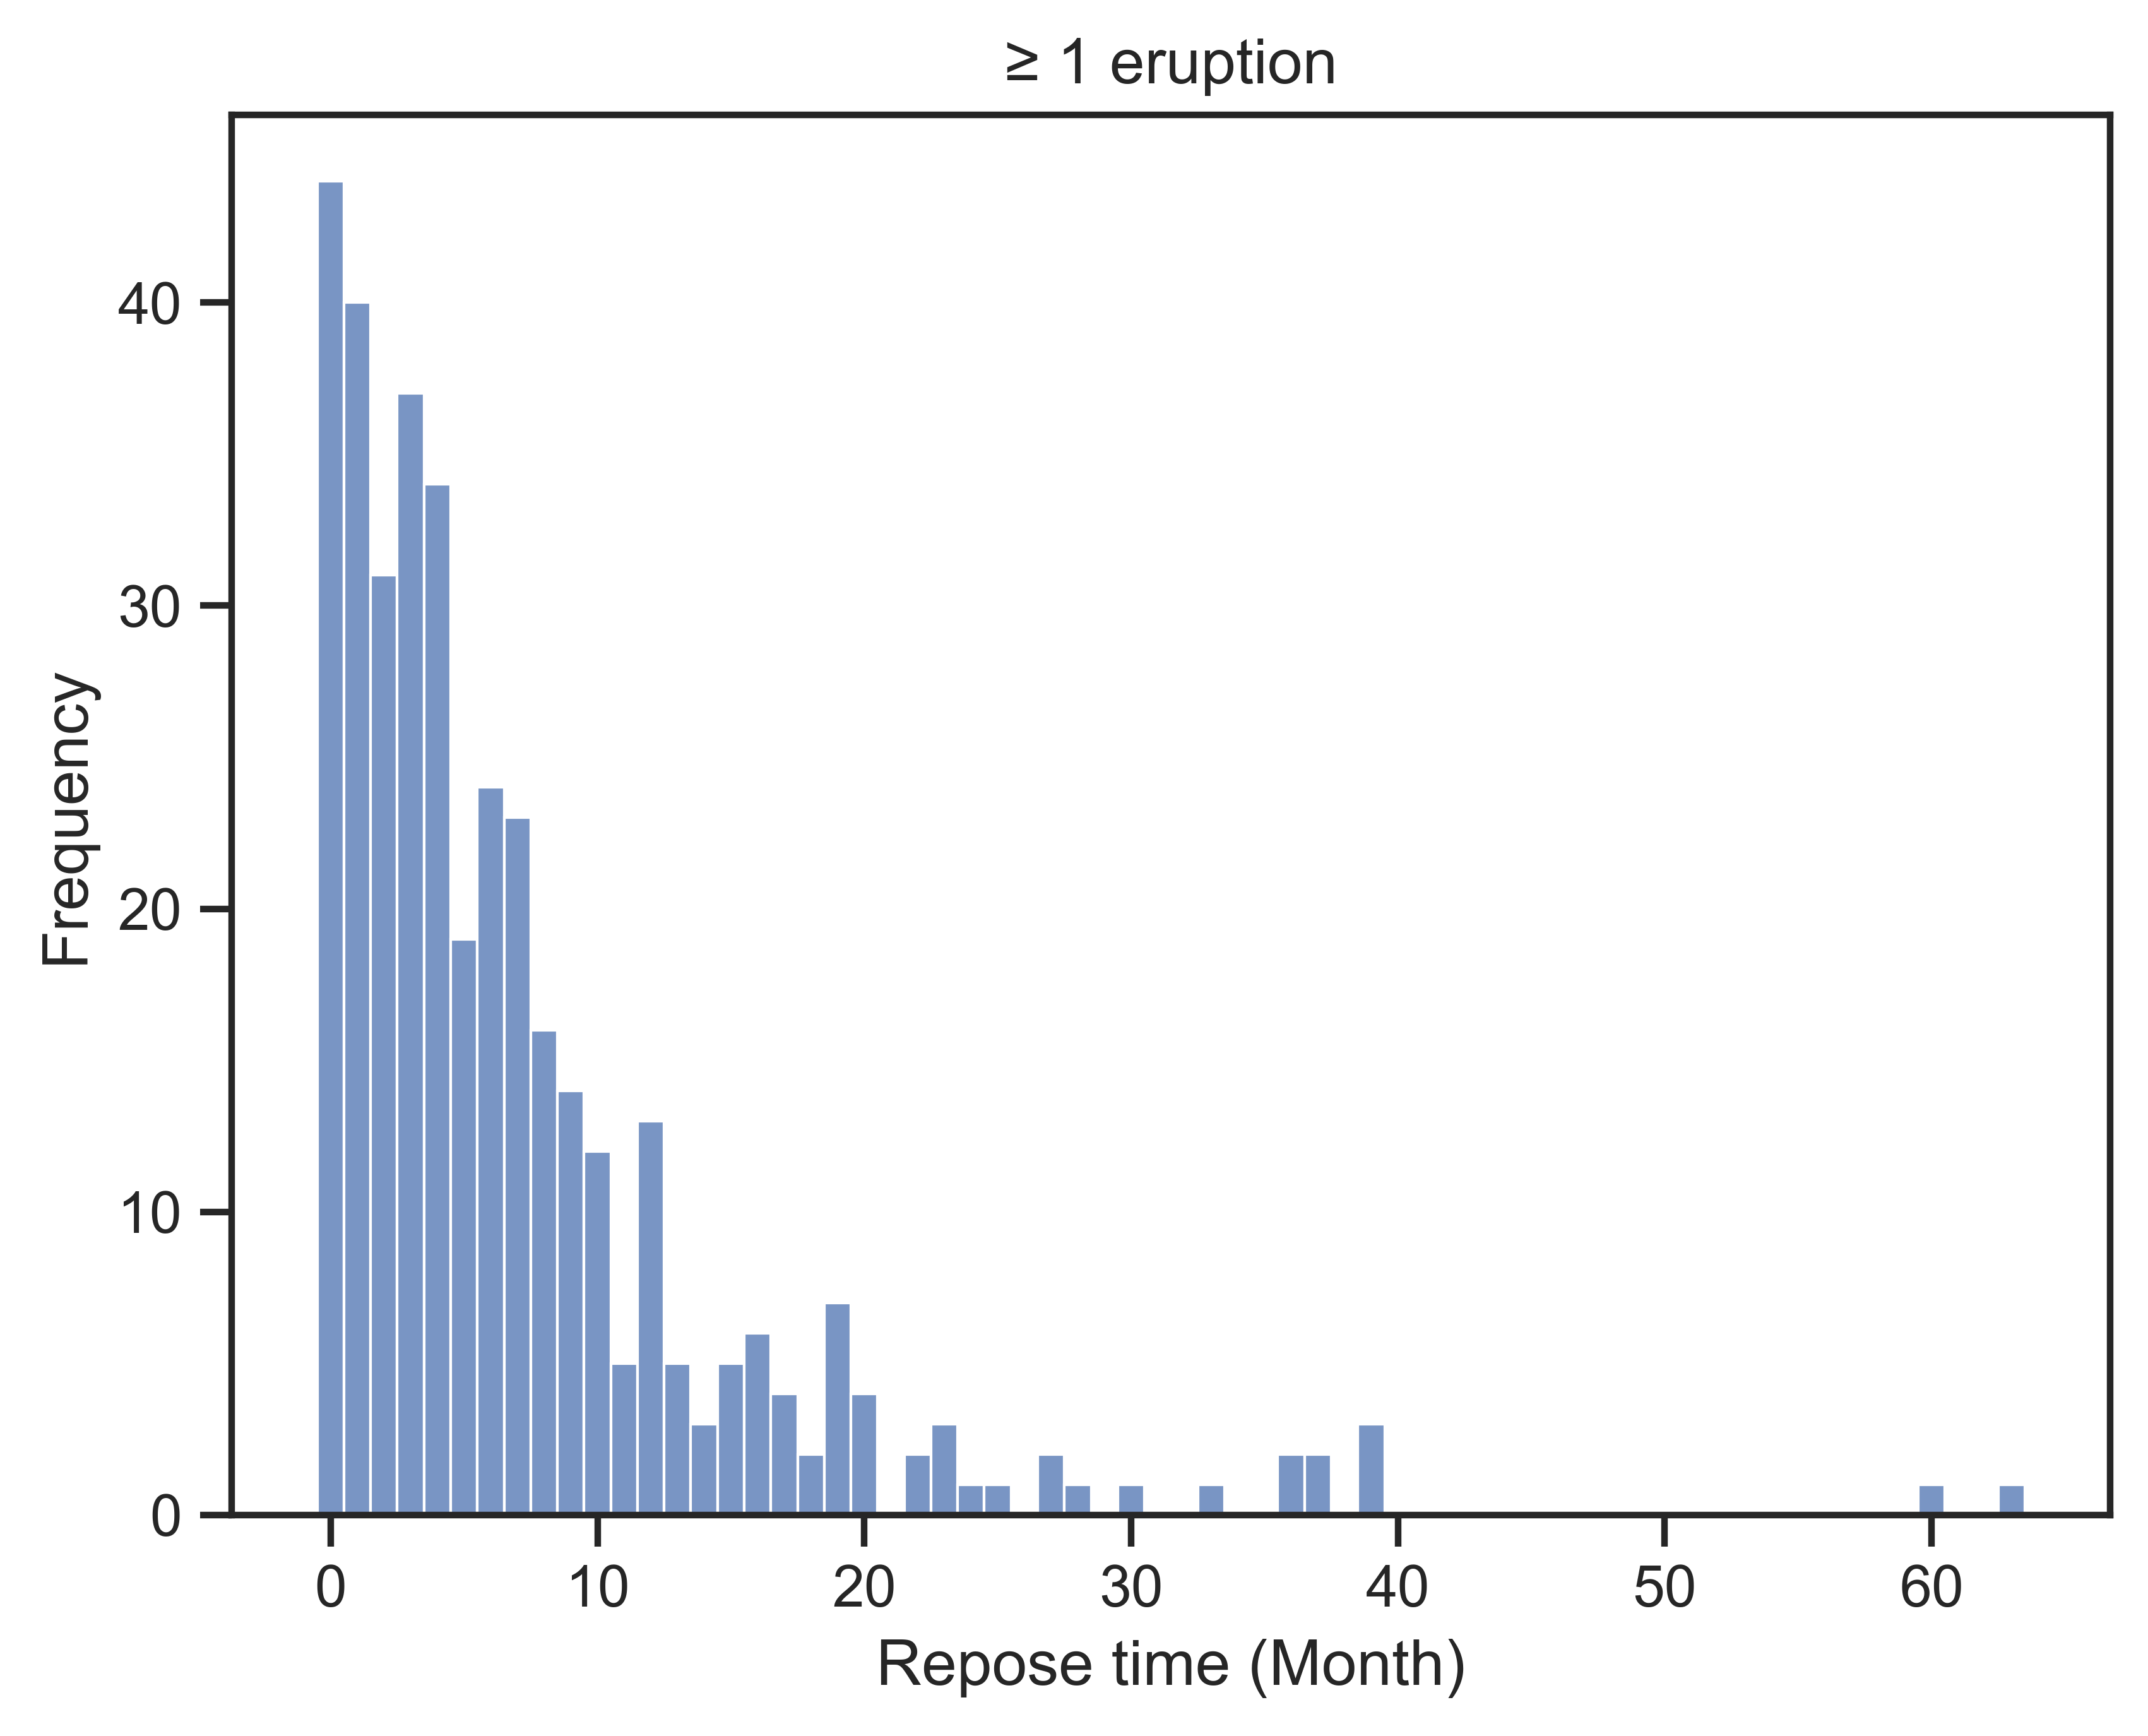

Repose
0.0     44
1.0     40
3.0     37
4.0     34
2.0     31
6.0     24
7.0     23
5.0     19
8.0     16
9.0     14
12.0    13
10.0    12
19.0     7
16.0     6
11.0     5
15.0     5
13.0     5
20.0     4
17.0     4
23.0     3
14.0     3
39.0     3
37.0     2
27.0     2
22.0     2
36.0     2
18.0     2
33.0     1
63.0     1
60.0     1
28.0     1
24.0     1
30.0     1
25.0     1
Name: count, dtype: int64

In [8]:
import seaborn as sns
sns.histplot(data=list2.Repose, discrete=True)
plt.ylabel('Frequency')
plt.xlabel('Repose time (Month)')
plt.title('≥ 1 eruption')
plt.show()
list2['Repose'].value_counts()

## Modelling

C:\Users\geika\AppData\Local\Temp\ipykernel_16380\187975639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list2.loc[list2.Repose >=0, 'Status'] = 1
C:\Users\geika\AppData\Local\Temp\ipykernel_16380\187975639.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list2['Repose'] = list2['Repose'].replace([0], 0.5)


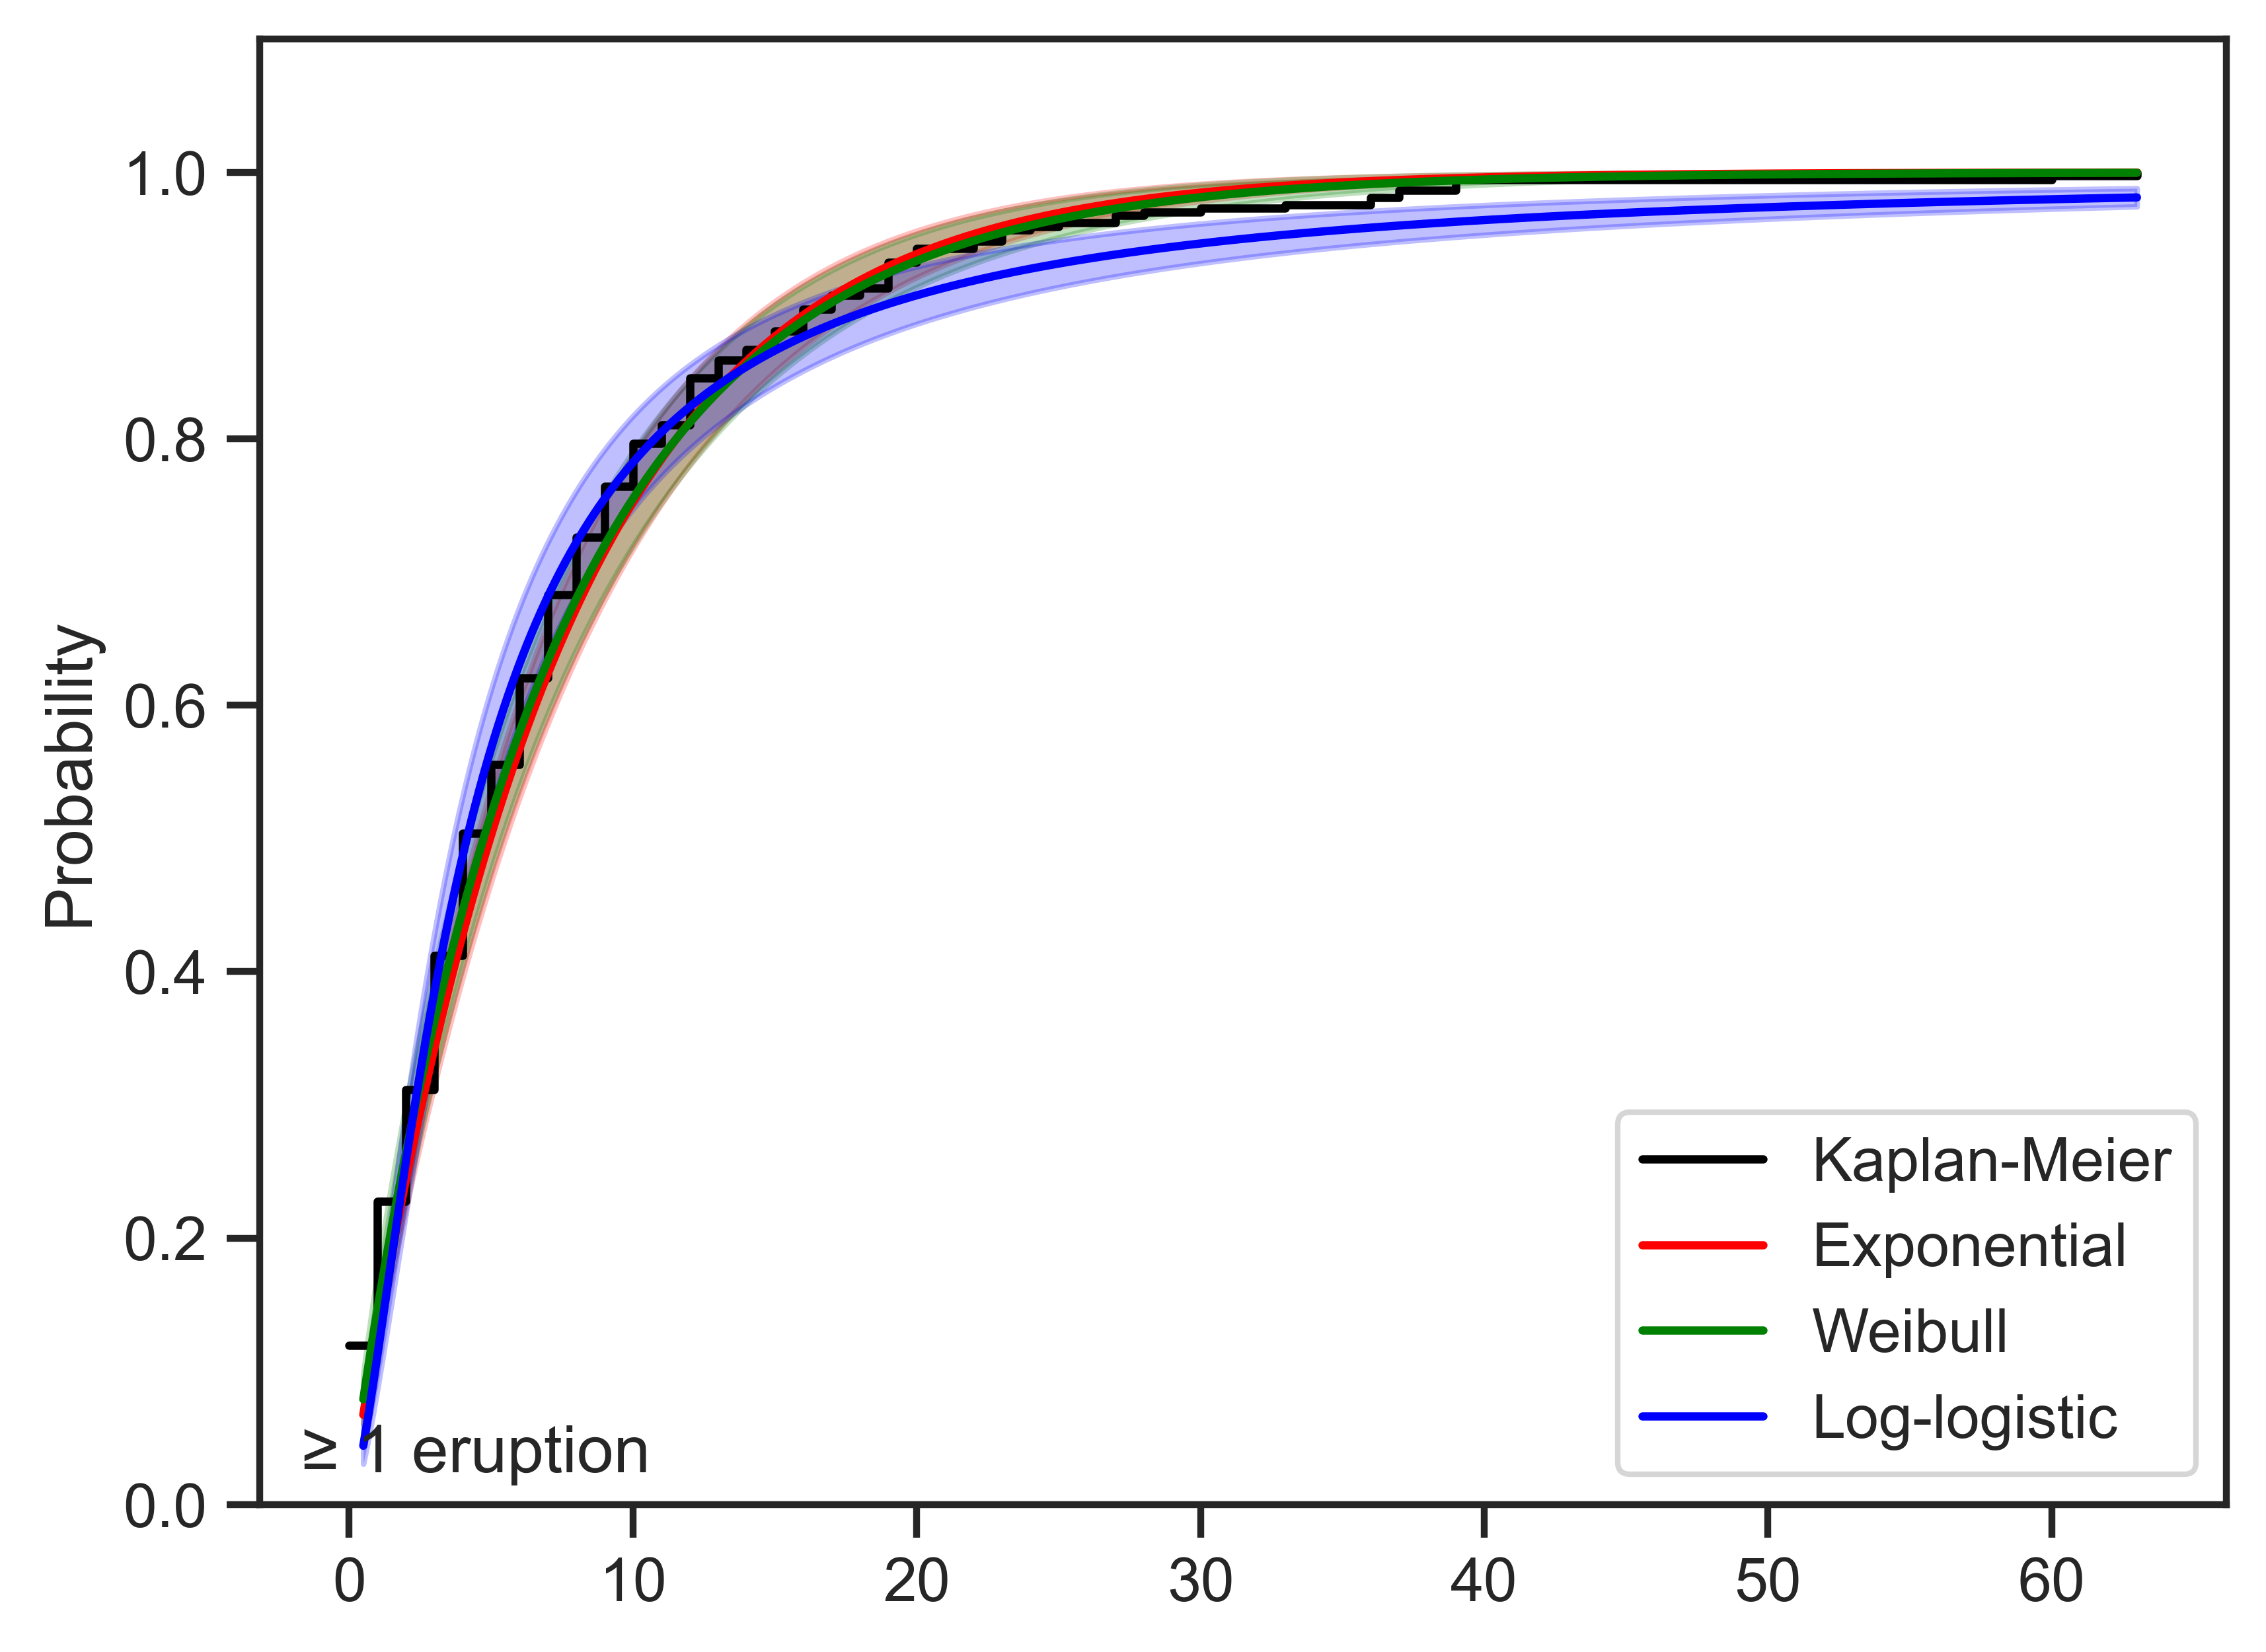

In [9]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
list2.loc[list2.Repose >=0, 'Status'] = 1
kmf.fit(durations=list2['Repose'], event_observed=list2['Status'], alpha=None)
list2['Repose'] = list2['Repose'].replace([0], 0.5)
kmf.plot_cumulative_density(ci_show=False, label='Kaplan-Meier',color='black')

#exponential
from lifelines import ExponentialFitter
exf = ExponentialFitter()
exf.fit(durations=list2['Repose'], event_observed=list2['Status'], alpha=None)
exf.plot_cumulative_density(ci_show=True, label='Exponential',color='red')

#weibull
from lifelines import WeibullFitter
wbf = WeibullFitter()
wbf.fit(durations=list2['Repose'], event_observed=list2['Status'], alpha=None)
wbf.plot_cumulative_density(ci_show=True, label='Weibull',color='green')

#loglogistic
from lifelines import LogLogisticFitter
llf = LogLogisticFitter()
llf.fit(durations=list2['Repose'], event_observed=list2['Status'], alpha=None)
llf.plot_cumulative_density(ci_show=True, label='Log-logistic',color='blue')
plt.ylabel('Probability')
plt.xlabel('')
plt.title('≥ 1 eruption',x=0.11,y=0)
plt.ylim(0,1.1)
plt.yticks(np.arange(0,1.2,0.2))
plt.legend(loc=4)
plt.show()

## Evaluation

In [10]:
wbf.print_summary()
exf.print_summary()
llf.print_summary()

print(kmf.cumulative_density_at_times([6,12,24,60.120]))
print(wbf.cumulative_density_at_times([6,12,24,60.120]))
print(exf.cumulative_density_at_times([6,12,24,60.120]))
print(llf.cumulative_density_at_times([6,12,24,60.120]))

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 369 total observations, 0 right-censored observations>
   number of observations = 369
number of events observed = 369
           log-likelihood = -1094.67
               hypothesis = lambda_ != 1, rho_ != 1

---
         coef  se(coef)  coef lower 95%  coef upper 95%
lambda_  6.98      0.41            6.18            7.77
rho_     0.95      0.04            0.87            1.02

         cmp to     z      p  -log2(p)
lambda_    1.00 14.74 <0.005    160.90
rho_       1.00 -1.42   0.16      2.67
---
AIC = 2193.35

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 369 total observations, 0 right-censored observations>
   number of observations = 369
number of events observed = 369
           log-likelihood = -1095.65
               hypothesis = lambda_ != 0

---
         coef  se(coef)  coef lower 95%  coef upper 95%
lambda_  7.17      0.37            6.43            7.90

         cmp to     z      p  -log2(p)
lambda_    0.00 19.21 <0.005    270.77
---
AIC = 2193.31

<lifelines.LogLogisticFitter:"LogLogistic_estimate", fitted with 369 total observations, 0 right-censored observations>
   number of observations = 369
number of events observed = 369
           log-likelihood = -1098.50
               hypothesis = alpha_ != 1, beta_ != 1

---
        coef  se(coef)  coef lower 95%  coef upper 95%
alpha_  4.15      0.26            3.64            4.66
beta_   1.45      0.06            1.33            1.58

        cmp to     z      p  -log2(p)
alpha_    1.00 12.04 <0.005    108.41
beta_     1.00  7.26 <0.005     41.25
---
AIC = 2200.99

6.00     0.620596
12.00    0.845528
24.00    0.959350
60.12    0.997290
Name: KM_estimate, dtype: float64
6.00     0.579709
12.00    0.812057
24.00    0.960191
60.12    0.999545
Name: Weibull_estimate, dtype: float64
6.00     0.567152
12.00    0.812642
24.00    0.964897
60.12    0.999773
Name: Exponential_estimate, dtype: float64
6.00     0.630883
12.00    0.823968
24.00    0.927635
60.12    0.979878
Name: LogLogistic_estimate, dtype: float64
